In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_excel('Columnsubsetdata.xlsx')

In [17]:
#df.info()

'''
after checking all difference decided to go with createDate.Drop all other 4 column because it all means same only..
#df["createDateDiff"] = df["CreateDate"]- df["SourceCreateDate"]
#df["modifiedDateDiff"] = df["ModifiedDate"]- df["SourceModifiedDate"]
#df["ImpactDateDiff"] = df["ImpactStartDate"]- df["SourceCreateDate"]
'''

df.drop(['SourceCreateDate','SourceModifiedDate','ModifiedDate','ImpactStartDate'],inplace=True , axis = 1)

'''
As raisingDatacenter has more count as well as PHX not present in occuringDatacenter we decided to choose
raisingDatacenter.
'''

df.drop(['OccurringDatacenter'],inplace=True, axis = 1)

'''
As mitigateddate data is more and difference between two date is minimal so we are going with mitigated date.

#df['resolvedatediff'] = df['ResolveDate'] - df['MitigateDate']

'''
df.drop(['ResolveDate'],inplace=True, axis = 1)

'''
As mitigatedby data is more choosing mitigated by compared to resolved by
'''
df.drop(['ResolvedBy'],inplace=True, axis = 1)


In [18]:
#df.info()

In [19]:
# converting in minutes because we need SLA in minutes only
df['SLA'] = (df['MitigateDate'] - df['CreateDate']).astype('timedelta64[m]')
df.describe()

IncidentId      Severity       IsNoise  IsSecurityRisk  \
count  2.335300e+04  23353.000000  23353.000000         23353.0   
mean   9.980804e+07      3.475999      0.000043             0.0   
std    3.802602e+06      0.513554      0.006544             0.0   
min    9.398681e+07      2.000000      0.000000             0.0   
25%    9.621660e+07      3.000000      0.000000             0.0   
50%    9.955558e+07      3.000000      0.000000             0.0   
75%    1.029693e+08      4.000000      0.000000             0.0   
max    1.070052e+08      4.000000      1.000000             0.0   

       IsCustomerImpacting           SLA  
count         23353.000000   4861.000000  
mean              0.006380   4253.650689  
std               0.079623   6540.896853  
min               0.000000      1.000000  
25%               0.000000    470.000000  
50%               0.000000   1838.000000  
75%               0.000000   6323.000000  
max               1.000000  69595.000000

In [20]:
# we need to perform operation on severity and sla so need to separate out those columns in dataframe 
temp_SLA = df[~df.SLA.isnull()][['Severity','SLA']]

In [21]:
temp_SLA = pd.DataFrame(temp_SLA,columns=['Severity','SLA'])
temp_SLA.shape

(4861, 2)

In [22]:
#need to get mean,median,mode,min,max for each severity value ex 4,3,2
severity_value = temp_SLA.Severity.value_counts().index

In [23]:
#calculating severity aggregate function using list..

minimum_value = []
maximum_value = []
mode_value = []
mean_value = []
median_value = []

for i in severity_value:
    temp = temp_SLA[temp_SLA.Severity == i]
    minimum_value.append(np.min(temp['SLA']))
    maximum_value.append(np.max(temp['SLA']))
    mean_value.append(np.mean(temp['SLA']))
    median_value.append(np.median(temp['SLA']))
    mode_value.append(temp['SLA'].mode())

In [24]:
#concatenate all severity value in a dataframe so we can showcase properly.

severity_pivot = pd.concat([pd.DataFrame(minimum_value),pd.DataFrame(maximum_value), \
           pd.DataFrame(mean_value),pd.DataFrame(median_value),pd.DataFrame(mode_value)],axis=1,)
#severity_pivot/60

In [25]:
#change column name , index and divide by 60 for converting in hours and showcase as pivot data.

severity_pivot.columns = ['min','max','mean','median','mode']
severity_pivot.index = [4,3,2]
severity_pivot = severity_pivot/60
print(round(severity_pivot))

   min     max  mean  median   mode
4  0.0  1160.0  69.0    31.0  126.0
3  0.0  1009.0  74.0    29.0  131.0
2  2.0    52.0  16.0     7.0    5.0


In [26]:
df.OwningTenantName.value_counts()

Cloudnet                                    21092
MCIO Cloud Operations Platform Services       940
Network Graph Generator Workflow Service      819
Autopilot Service Escalations                 278
Azure Capacity Infrastructure Service         145
Windows Azure Hardware RMA                     18
Azure Hardware Datacenter Manager              15
Network Operations                             15
Xstore                                         14
Compute Manager                                 6
Global Ecosystem Buildout Team                  5
Windows Azure Operations Center                 3
OneFleet Node                                   2
Network Delivery Services                       1
Name: OwningTenantName, dtype: int64

In [27]:
df.ResponsibleTenantName.value_counts()

Cloudnet                                    18862
MCIO Cloud Operations Platform Services      2668
Network Graph Generator Workflow Service     1242
Azure Capacity Infrastructure Service         329
Autopilot Service Escalations                  77
Geneva Monitoring                              47
Windows Azure Hardware RMA                     42
OneFleet Node                                  31
Azure Hardware Datacenter Manager              24
Xstore                                         19
Azure Buildout SRE                              8
Compute Manager                                 4
Name: ResponsibleTenantName, dtype: int64

In [28]:
#calculate dataframe which have mitigate value otherwise discard...

df_full = df[~df.MitigateDate.isnull()]
#df_full.info()
#df_full = df_full.sort_values(by=['IncidentId', 'CreateDate','OccurringDeviceName'], ascending=False)
#df_full.to_excel('Sort.xlsx')

In [29]:
#df_full.drop_duplicates(inplace=True)
df_full['OccurringDeviceName'].replace('', np.nan, inplace=True)
df_full.dropna(subset=['OccurringDeviceName'], inplace=True)

df_full['RaisingDatacenter'].replace('', np.nan, inplace=True)
df_full.dropna(subset=['RaisingDatacenter'], inplace=True)

df_full = df_full.drop_duplicates(['IncidentId'], keep = 'first')

print(df_full.shape)
df_full.to_excel('Subset_without_null.xlsx')

C:\Anaconda\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1982, 17)


In [158]:
#missing values in occuring device name when mitigate value is present..
df_full.OccurringDeviceName.isnull().sum()

0

### Failing network devices and data center 

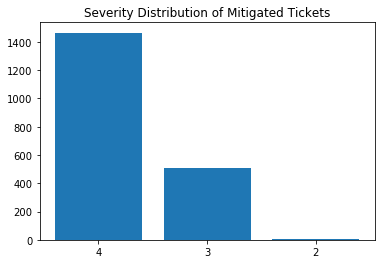

In [159]:
severity = df_full["Severity"].value_counts()

severity = severity.to_frame()
severity.columns = ['severity_value']
severity['severity_name'] = severity.index
severity.reset_index(drop=True,inplace=True)

plt.figure(figsize=(6,4)) 
y_pos = np.arange(len(severity.severity_name)) 
plt.bar(y_pos,severity.severity_value) 
plt.xticks(y_pos, severity.severity_name) 
plt.title('Severity Distribution of Mitigated Tickets')
plt.show()

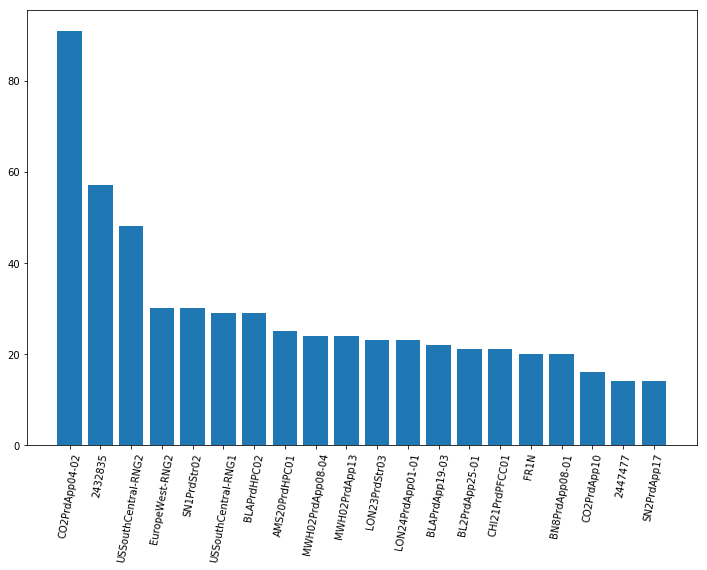

In [161]:
# checking top20 count of occuring device name and plotting it..

occuring_hist = df_full.OccurringDeviceName.value_counts().head(20)
occuring_hist = occuring_hist.to_frame()
occuring_hist.columns = ['occuring_value']
occuring_hist['occuring_name'] = occuring_hist.index
occuring_hist.reset_index(drop=True,inplace=True)
#print(occuring_hist)

plt.figure(figsize=(12,8)) 
y_pos = np.arange(len(occuring_hist.occuring_name)) 
plt.bar(y_pos,occuring_hist.occuring_value) 
plt.xticks(y_pos, occuring_hist.occuring_name,rotation=80) 
plt.show()

In [162]:
#missing values in raising data center when mitigate value is present..
df_full.RaisingDatacenter.isnull().sum()

0

In [163]:
#checking top20 raising data center and plotting it...
raising_hist = df_full.RaisingDatacenter.value_counts().head(20)
raising_hist = raising_hist.to_frame()
raising_hist.columns = ['raising_value']
raising_hist['raising_name'] = raising_hist.index
raising_hist.reset_index(drop=True,inplace=True)

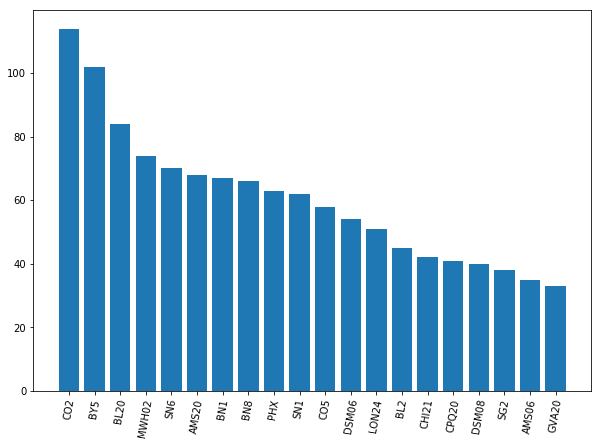

In [164]:
plt.figure(figsize=(10,7))

y_pos = np.arange(len(raising_hist.raising_name))
plt.bar(y_pos,raising_hist.raising_value)
plt.xticks(y_pos, raising_hist.raising_name,rotation=80)
plt.show()

In [165]:
Tsg_df = df_full.iloc[:,[2,3,4,8,9,14,15]]
Tsg_df.head()
Tsg_df.shape

(1982, 7)

In [166]:
Tsg_df.dropna(inplace=True)
Tsg_df.shape

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(1969, 7)

In [167]:
y = Tsg_df['TsgId']
X = Tsg_df.drop(['TsgId'], axis=1)
X.head(10)
#y.head(10)

RaisingDatacenter  OccurringDeviceName  Severity  IsCustomerImpacting  \
3              AMS21      EuropeWest-RNG2         4                    0   
8                BY5            FID297137         4                    0   
14             PUS20              2317284         4                    0   
22             LON22        LON22PrdStr02         3                    0   
31             AMS21      EuropeWest-RNG2         3                    0   
36             AMS21      EuropeWest-RNG2         4                    0   
40             MWH02     MWH02PrdApp08-04         4                    0   
46               BN8              2488169         3                    0   
87              DM3N  DM3S-0101-0107-14T0         3                    0   
93               BN8          BN8PrdStp03         4                    0   

   OwningTenantName ResponsibleTenantName  
3          Cloudnet              Cloudnet  
8          Cloudnet              Cloudnet  
14         Cloudnet              Cloudnet  
22         Cloudnet              Cloudnet  
31         Cloudnet              Cloudnet  
36         Cloudnet              Cloudnet  
40         Cloudnet              Cloudnet  
46         Cloudnet              Cloudnet  
87         Cloudnet              Cloudnet  
93         Cloudnet              Cloudnet

In [168]:
y.value_counts()

Onenote - https://aka.ms/PhyNet_Build_TSG ;  AzureWiki - https://aka.ms/AzureWiki_PhyNet_Build_TSG    900
https://aka.ms/PhyNet_Build_TSG ; https://aka.ms/AzureWiki_PhyNet_Build_TSG                           803
https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka.ms/AzureWiki_PhyNet_Build_TSG                          232
https://aka.ms/PhyNet_Build_TSG ; https://aka.ms/AzureWiki_PhyNe                                       12
https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka.ms/AzureWiki_PhyNe                                      11
Onenote - https://aka.ms/PhyNet_Build_TSG ;  AzureWiki - https:/                                       10
https://aka.ms/PhyNet_Build_TSG ; \n https://aka.ms/AzureWiki_PhyNet_Build_TSG                          1
Name: TsgId, dtype: int64

### tsg Recommendation based on an incident profile

In [169]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [170]:
label_index = ['RaisingDatacenter','OccurringDeviceName','OwningTenantName','ResponsibleTenantName']

for i in label_index:
    X[i] = LabelEncoder().fit_transform(X[i])

In [171]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)
unique, counts = np.unique(y_test, return_counts=True)
print(unique, counts)

[0 1 2 3 5 6] [  8 625   4 169   9 563]
[0 1 2 3 4 5 6] [  2 275   7  63   1   3 240]


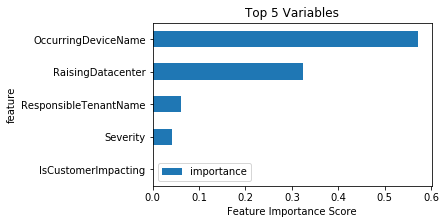

In [173]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

feat_imp = pd.DataFrame({'importance':rf.feature_importances_})    
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:5]
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Top 5 Variables", figsize=(5,3))
plt.xlabel('Feature Importance Score')
plt.show()

In [174]:
y_pred = rf.predict(X_test)

In [175]:
confusion_test = confusion_matrix(y_test,y_pred).T

In [176]:
precision_list = []

for i in range(0,6):
    total_row =np.sum(confusion_test[i])
    for j in range(0,6):
        if i == j:
            precision_list.append(confusion_test[i][j]/total_row)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


In [177]:
precision_list

[nan, 0.79296875, 0.7142857142857143, 0.5581395348837209, nan, 0.25]

In [178]:
print("CONFUSION MATRIX FOR TEST DATA SET")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True).T

CONFUSION MATRIX FOR TEST DATA SET


True       0    1  2   3  4  5    6  All
Predicted                               
1          0  203  0  19  1  1   32  256
2          0    2  5   0  0  0    0    7
3          1   15  0  24  0  0    3   43
5          0    1  0   1  0  1    1    4
6          1   54  2  19  0  1  204  281
All        2  275  7  63  1  3  240  591

In [179]:
from sklearn.metrics import f1_score
print("F1 SCORE FOR TEST DATA SET ======>>>>>", f1_score(y_test,y_pred,average='macro'))

F1 SCORE FOR TEST DATA SET ======>>>>> 0.42864781389254325


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [180]:
y_pred = rf.predict(X_train)
print("CONFUSION MATRIX FOR TRAIN DATA SET======>>>>>")
confusion_train = confusion_matrix(y_train,y_pred).T
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True).T

CONFUSION MATRIX FOR TRAIN DATA SET======>>>>>


True       0    1  2    3  5    6   All
Predicted                              
0          5    0  0    0  0    0     5
1          1  584  0   22  0   13   620
2          0    1  4    3  0    0     8
3          0   10  0  126  0    6   142
5          0    0  0    0  9    0     9
6          2   30  0   18  0  544   594
All        8  625  4  169  9  563  1378

In [181]:
print("F1 SCORE FOR TRAIN DATA SET======>>>>>", f1_score(y_train,y_pred,average='macro'))

F1 SCORE FOR TRAIN DATA SET======>>>>> 0.8541170738642442


### Automatic routing to right #engineer based on issue type

In [188]:
df_agent_clustering = df_full[['RaisingDatacenter','OccurringDeviceName',
                                      'Severity','IsCustomerImpacting','TsgId','MitigatedBy',
                                      'OwningTenantName','ResponsibleTenantName']]
df_agent_clustering.dropna(inplace=True)
df_agent_clustering.shape

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(1969, 8)

In [190]:
label_index = ['RaisingDatacenter','OccurringDeviceName','TsgId','MitigatedBy','OwningTenantName','ResponsibleTenantName']

for i in label_index:
    df_agent_clustering[i] = LabelEncoder().fit_transform(df_agent_clustering[i])
#df_agent_clustering.head(5)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [191]:
df_agent_freq = df_agent_clustering.MitigatedBy.value_counts()

df_agent_freq = df_agent_freq.to_frame()

df_agent_freq.columns = ['Frequency']
df_agent_freq['MitigatedBy'] = df_agent_freq.index
df_agent_freq.reset_index(drop=True,inplace=True)
#print(df_agent_freq)

#pd.merge(df_agent_clustering,df_agent_freq,on='MitigatedBy')
df_agent_clustering = df_agent_clustering.join(df_agent_freq.set_index('MitigatedBy'), on='MitigatedBy')


In [192]:
print(df_agent_clustering['Frequency'].describe())
#print(df_agent_clustering.iloc[8,0])
df_agent_clustering["Binned"] = 0

count    1969.000000
mean      141.550533
std        86.536194
min         1.000000
25%        64.000000
50%       164.000000
75%       211.000000
max       248.000000
Name: Frequency, dtype: float64


In [193]:
for i in range(len(df_agent_clustering)):
    if df_agent_clustering.iloc[i,8] >= 200:       
        df_agent_clustering.iloc[i,9] = 1
    elif df_agent_clustering.iloc[i,8] >= 150 and df_agent_clustering.iloc[i,8] < 199:
         df_agent_clustering.iloc[i,9] = 2
    elif df_agent_clustering.iloc[i,8] >= 75 and df_agent_clustering.iloc[i,8] < 149:
         df_agent_clustering.iloc[i,9] = 3
    else:
         df_agent_clustering.iloc[i,9] = 4     

In [194]:
#print(df_agent_clustering.head())
temp = pd.DataFrame(pd.crosstab(df_agent_clustering['Binned'],df_agent_clustering['MitigatedBy'])).T
temp.to_excel("Number_Of_Agents_In_Each_Group.xlsx")

In [195]:
X = df_agent_clustering[['RaisingDatacenter','OccurringDeviceName', 'Severity','IsCustomerImpacting','TsgId',
                                      'OwningTenantName','ResponsibleTenantName']]
y = df_agent_clustering[['Binned']]

In [196]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)
unique, counts = np.unique(y_test, return_counts=True)
print(unique, counts)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

[1 2 3 4] [620 113 270 375]
[1 2 3 4] [273  51 120 147]


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [197]:
confusion_train = confusion_matrix(y_train,y_train_pred)
confusion_test = confusion_matrix(y_test,y_test_pred)

print("\nConfusion matrix for train data\n")
print(confusion_train)

print("\nConfusion matrix for test data\n")
print(confusion_test)


Confusion matrix for train data

[[561  10  22  27]
 [ 21  82   7   3]
 [ 43  10 201  16]
 [ 42  10  25 298]]

Confusion matrix for test data

[[205  11  23  34]
 [ 21  15   4  11]
 [ 41   8  49  22]
 [ 31   3  25  88]]


In [198]:
print("Train data F1-score=",f1_score(y_train,y_train_pred,average='macro'))
print("Test data F1-score=",f1_score(y_test,y_test_pred,average='macro'))

Train data F1-score= 0.7988317786370637
Test data F1-score= 0.5212919976966388


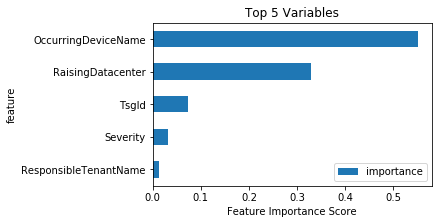

In [199]:
feat_imp = pd.DataFrame({'importance':rf.feature_importances_})    
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:5]
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Top 5 Variables", figsize=(5,3))
plt.xlabel('Feature Importance Score')
plt.show()

### Predictive TAT for an incident, based on previous incident resolution history

In [200]:
df_SLA = df_full[['RaisingDatacenter','OccurringDeviceName',
                  'Severity','IsCustomerImpacting','TsgId','OwningTenantName','ResponsibleTenantName','SLA']]
df_SLA.dropna(inplace=True)
df_SLA.shape
#df_SLA.head(10)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(1969, 8)

In [201]:
X = df_SLA[['RaisingDatacenter','OccurringDeviceName','Severity',
                 'IsCustomerImpacting','TsgId','OwningTenantName','ResponsibleTenantName']]
y = df_SLA[['SLA']]

label_index = ['RaisingDatacenter','OccurringDeviceName','TsgId','OwningTenantName','ResponsibleTenantName']

for i in label_index:
    X[i] = LabelEncoder().fit_transform(X[i])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [202]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.30, random_state=42)

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

Random forest output

R2 for training Dataset
0.7552817860373013

R2 for test Dataset
0.24380024194450411


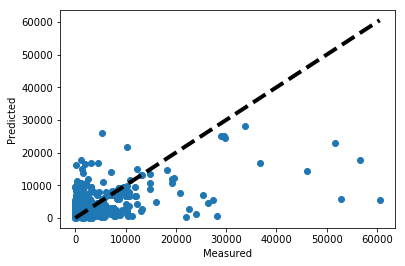

In [204]:
from sklearn.metrics import r2_score

print("Random forest output\n")

print("R2 for training Dataset")
print(r2_score(y_train,rf_reg.predict(X_train)))

print("\nR2 for test Dataset")
print(r2_score(y_test,rf_reg.predict(X_test)))

fig,ax = plt.subplots()
ax.scatter(y_test, rf_reg.predict(X_test))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
#fig.show()
plt.show()

In [67]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizerz

In [75]:
df_full['word_count'] = df_full['Title'].apply(lambda x: len(str(x).split(" ")))
print(df_full[['Title','word_count']].head())
#print(df_full.word_count.describe())
#print(df_full.info())

                                                Title  word_count
3   ['EuropeWest-RNG2'] deployment blocked: Networ...          10
8   ['FID297137'] deployment blocked: NetworkProvi...          10
14  ['2317284'] deployment blocked: NetworkProvisi...          10
22  ['LON22PrdStr02'] deployment blocked: NetworkP...          10
31  ['EuropeWest-RNG2'] deployment blocked: Networ...          10


In [76]:
stop_words = set(stopwords.words("english"))

corpus = []
for i in range(0, 1982):
    
    # remove colon within [] 
    text=re.sub("'"," ",df_full.iloc[i,10])
     
    #remove words between [] ()    
    text = re.sub("[\(\[].*?[\)\]]", "",text )
    
    # remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)    
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)    
    corpus.append(text)

In [77]:
corpus

['deployment blocked networkprovisioning general investigation azure networking',
 'deployment blocked networkprovisioning general investigation azure networking',
 'deployment blocked networkprovisioning general investigation azure networking',
 'deployment blocked networkprovisioning general investigation azure networking',
 'deployment blocked networkprovisioning general investigation azure networking',
 'deployment blocked networkprovisioning general investigation azure networking',
 'deployment blocked networkprovisioning general investigation azure networking',
 'deployment blocked verify network configuration',
 'console issue dm',
 'deployment blocked verify network configuration',
 'deployment blocked verify network configuration',
 'gdco app escalate phynet network investigation blocked need assistance',
 'gdco app escalate phynet network investigation blocked need assistance',
 'deployment blocked networkprovisioning general investigation azure networking',
 'deployment bloc

(-0.5, 399.5, 199.5, -0.5)

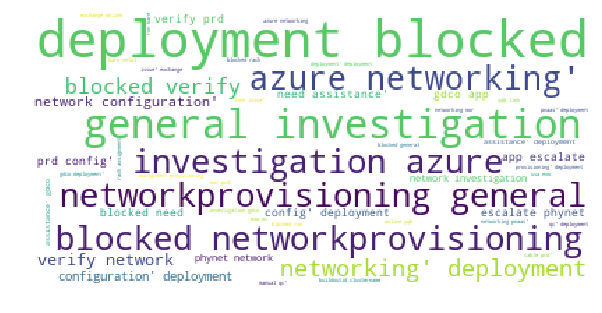

In [95]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

% matplotlib inline
wordcloud = WordCloud(background_color='white', stopwords=stop_words, max_words=50, max_font_size=50, random_state=42).generate(str(corpus))
fig, ax = plt.subplots(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
#plt.show()


In [96]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [98]:
list(cv.vocabulary_.keys())[:20]

['networkprovisioning',
 'general',
 'investigation',
 'azure',
 'networking',
 'blocked networkprovisioning',
 'networkprovisioning general',
 'general investigation',
 'investigation azure',
 'azure networking',
 'deployment blocked networkprovisioning',
 'blocked networkprovisioning general',
 'networkprovisioning general investigation',
 'general investigation azure',
 'investigation azure networking',
 'verify',
 'network',
 'configuration',
 'blocked verify',
 'verify network']

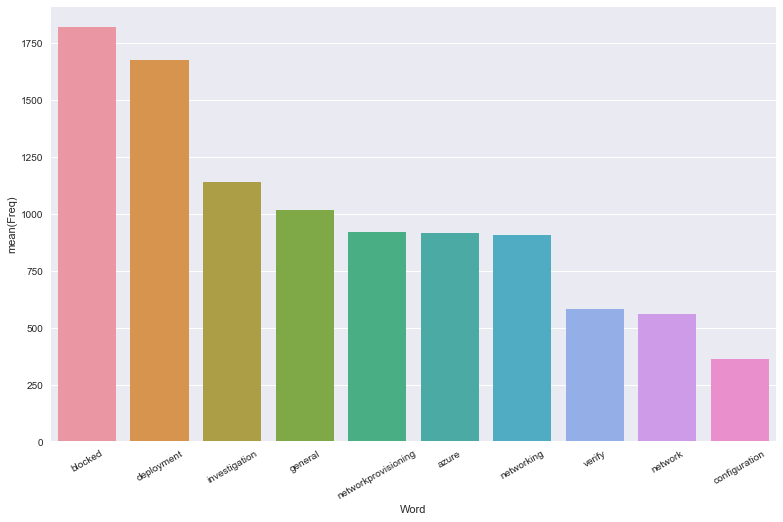

In [102]:
#Most frequently occuring words
import pandas 

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot

top_words = get_top_n_words(corpus, n= 10)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                        Bi-gram  Freq
0            deployment blocked  1620
1         general investigation   961
2   blocked networkprovisioning   912
3           investigation azure   906
4              azure networking   906
5   networkprovisioning general   905
6                blocked verify   580
7                verify network   362
8         network configuration   362
9                    verify prd   218
10                   prd config   218
11                 blocked need   190
12              need assistance   190
13                     gdco app   187
14                 app escalate   181


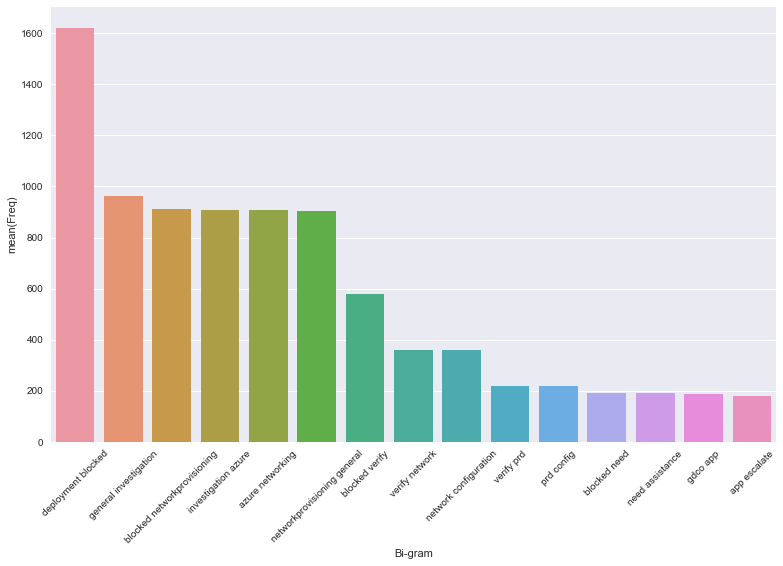

In [104]:
#Most frequently occuring Bi-grams

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n= 15)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [ ]:
#Remove Punctuations 
df_reduced['Comments'] = df_reduced['Comments'].str.replace('[^\w\s]','')
print("Punctuations Complete")
    
# Remove Stop Words
df_reduced['Comments'] = df_reduced['Comments'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
print("Stop Words Complete")
    
# Remove Common Words
freq = pd.Series(' '.join(df_reduced['Comments']).split()).value_counts()[:10]
freq = list(freq.index)
df_reduced['Comments'] = df_reduced['Comments'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
print("Common Words Complete")
    
# Remove Rare Words
freq = pd.Series(' '.join(df_reduced['Comments']).split()).value_counts()[-10:]
freq = list(freq.index)
df_reduced['Comments'] = df_reduced['Comments'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
print("Rare Words Complete")
    
# Lemmatization
df_reduced['Comments'] = df_reduced['Comments'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print("Lemmatization Complete")

tfidf = TfidfVectorizer(max_features=10000, analyzer='word', stop_words= 'english',ngram_range=(1,1), token_pattern=r'\w{3,}')
tfidf_vect = tfidf.fit_transform(df_reduced['Comments'])
print(tfidf_vect.shape)


X = pd.concat([df_reduced[['Device_Used', 'Browser_Used', 'Sentiment_Analyzer']].reset_index(drop=True), pd.DataFrame(tfidf_vect.toarray())], axis=1)
X.head()
y = df_reduced.iloc[:,4]